In [75]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
# Import dataset
training_set = pd.read_csv('mitbih_train.csv')
training_set.head()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


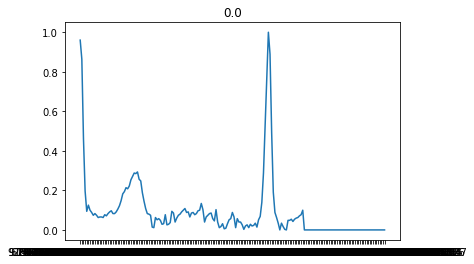

In [77]:
plt.plot(training_set.iloc[0, :-1])
plt.title(training_set.iloc[0, -1])
plt.show()

In [78]:
training_set.iloc[:, -1].value_counts()

0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 0.000000000000000000e+00.88, dtype: int64

In [79]:
X = np.expand_dims(np.array(training_set.iloc[:, :-1]), 2)
Y = training_set.iloc[:, -1]
from keras.utils import to_categorical
Y = to_categorical(Y)
pd.DataFrame(Y).head()

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [80]:
X.shape

(87553, 187, 1)

In [85]:
from keras.models import Sequential
from keras.layers import *

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=5, strides=1, input_shape=(187, 1)))

model.add(Conv1D(filters=32, kernel_size=5, strides=1, activation='relu', padding='same'))
model.add(Conv1D(filters=32, kernel_size=5, strides=1, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=5, strides=2))

for i in range(3):
    model.add(Conv1D(filters=32, kernel_size=5, strides=1, activation='relu', padding='same'))
    model.add(Conv1D(filters=32, kernel_size=5, strides=1, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=5, strides=2))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_19 (Conv1D)           (None, 183, 32)           192       
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 183, 32)           5152      
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 183, 32)           5152      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 90, 32)            0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 90, 32)            5152      
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 90, 32)            5152      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 43, 32)            0         
__________

In [87]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [89]:
testset = pd.read_csv('mitbih_test.csv')
X_test = np.expand_dims(np.array(testset.iloc[:, :-1]), 2)
Y_test = to_categorical(testset.iloc[:, -1])

model.fit(X, Y, epochs=50, batch_size=100, validation_data=(X_test, Y_test))

Train on 87553 samples, validate on 21891 samples
Epoch 1/50
87553/87553 [==============================] - 9s 103us/step - loss: 0.2868 - acc: 0.9197 - val_loss: 0.1622 - val_acc: 0.9551
Epoch 2/50
87553/87553 [==============================] - 8s 87us/step - loss: 0.1298 - acc: 0.9650 - val_loss: 0.1143 - val_acc: 0.9711
Epoch 3/50
87553/87553 [==============================] - 8s 86us/step - loss: 0.0983 - acc: 0.9735 - val_loss: 0.1003 - val_acc: 0.9740
Epoch 4/50
87553/87553 [==============================] - 8s 86us/step - loss: 0.0852 - acc: 0.9767 - val_loss: 0.0876 - val_acc: 0.9760
Epoch 5/50
87553/87553 [==============================] - 8s 86us/step - loss: 0.0746 - acc: 0.9790 - val_loss: 0.0794 - val_acc: 0.9777
Epoch 6/50
87553/87553 [==============================] - 8s 86us/step - loss: 0.0657 - acc: 0.9812 - val_loss: 0.0907 - val_acc: 0.9762
Epoch 7/50
87553/87553 [==============================] - 8s 87us/step - loss: 0.0600 - acc: 0.9828 - val_loss: 0.0675 - val_ac

In [105]:
Y_pred = model.predict(X_test)

In [106]:
Y_pred1 = np.array(Y_pred).argmax(axis=1)

In [92]:
Y_test = np.array(Y_test).argmax(axis=1)

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred1)

In [108]:
pd.DataFrame(cm)

,0,1,2,3,4
0,18066,17,14,15,5
1,109,434,9,3,1
2,38,2,1374,30,4
3,19,0,8,135,0
4,17,0,2,1,1588


In [109]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[18066    17    14    15     5]
 [  109   434     9     3     1]
 [   38     2  1374    30     4]
 [   19     0     8   135     0]
 [   17     0     2     1  1588]]


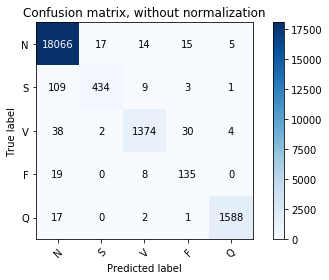

In [110]:
plot_confusion_matrix(Y_test, Y_pred1, classes=['N', 'S', 'V', 'F', 'Q'], title='Confusion matrix, without normalization')

Normalized confusion matrix
[[9.97184964e-01 9.38345201e-04 7.72754871e-04 8.27951648e-04
  2.75983883e-04]
 [1.96043165e-01 7.80575540e-01 1.61870504e-02 5.39568345e-03
  1.79856115e-03]
 [2.62430939e-02 1.38121547e-03 9.48895028e-01 2.07182320e-02
  2.76243094e-03]
 [1.17283951e-01 0.00000000e+00 4.93827160e-02 8.33333333e-01
  0.00000000e+00]
 [1.05721393e-02 0.00000000e+00 1.24378109e-03 6.21890547e-04
  9.87562189e-01]]


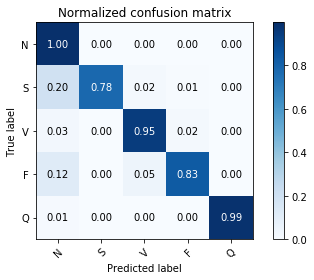

In [111]:
plot_confusion_matrix(Y_test, Y_pred1, classes=['N', 'S', 'V', 'F', 'Q'], normalize=True,
                      title='Normalized confusion matrix')